1. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
2. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).
3. __Use the__ `Validate` __button in the Assignments tab before submitting__.

__Include comments, derivations, explanations, graphs, etc.__ 

You __work in groups__ (= 3 people). __Write the full name and S/U-number of all team members!__

GROUP NUMBER (brightspace): 43
* Student 1 Stian Grønlund, s1122151:
* Student 2 name, S/U-number:
* Student 3 name, S/U-number:

---

# Assignment 1 (Statistical Machine Learning 2024)
# **Deadline: 27 September 2024**

## Instructions
* Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE` __including comments, derivations, explanations, graphs, etc.__ 
Elements and/or intermediate steps required to derive the answer have to be in the report. If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends.
* Please do __not add new cells__ to the notebook, try to write the answers only in the provided cells. Before you turn the assignment in, make sure everything runs as expected.
* __Use the variable names given in the exercises__, do not assign your own variable names. 
* __Only one team member needs to upload the solutions__. This can be done under the Assignments tab, where you fetched the assignments, and where you can also validate your submissions. Please do not change the filenames of the individual Jupyter notebooks.

For any problems or questions regarding the assignments, ask during the tutorial or send an email to charlotte.cambiervannooten@ru.nl and janneke.verbeek@ru.nl .

## Introduction
Assignment 1 consists of:
1. __Polynomial curve fitting (50 points);__
2. Gradient descent (25 points);
3. Fruit boxes (25 points);
4. Probability factorization (BONUS 10 points);

## Libraries

Please __avoid installing new packages__, unless really necessary.

In [1]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it to at least version 3."

# Necessary imports (for solutions)
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# Set fixed random seed for reproducibility
np.random.seed(2022)

## Polynomial curve fitting (weight 50)
Consider once more the $M$-th order polynomial 
\begin{equation*}
y(x;\mathbf{w}) = w_0 + w_1 x + \ldots + w_M x^M  = \sum_{j=0}^M w_j x^j 
\label{yxw} \tag{1}
\end{equation*}

### Exercise 1.1
Create the function $f(x) = 2 + \cos(6(x - 3))$. Generate a data set $\mathcal{D}_{10}$ of 10 noisy observations of this function. Take the 10 inputs spaced uniformly in range $[0,1]$, and assume that the noise is Gaussian with mean 0 and standard deviation 0.2. $\mathcal{D}_{10}$ will be the training set. In a similar way, generate an additional test set $\mathcal{T}$ of 100 noisy observations over the same interval. Plot both the function and observations in $\mathcal{D}_{10}$ in a single graph (similar to Bishop, Figure 1.2).

In [2]:
def f(x):
    """
    This function computes f(x) = 2 + cos(6(x−3))
    
    Parameters
    ----------
    x : float
        Input number.
    
    Returns
    -------
    float
        Result of the function.
    """
    # YOUR CODE HERE
    return (2 + np.cos(6*(x-3)))

In [3]:
"""
Basic check that function f is correct.
"""
assert f(3) == 3.0
assert f(np.pi/2 + 3) == 1.0

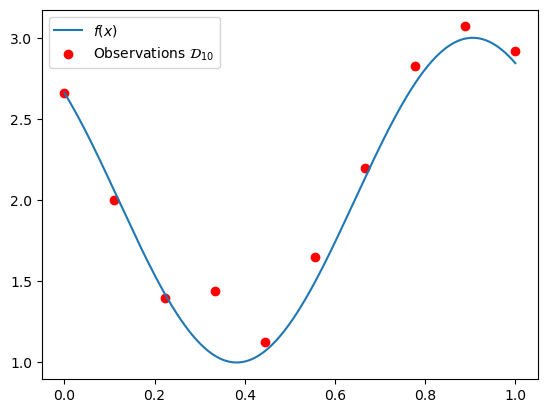

In [4]:
"""
Generate a data set of N_train noisy observations of the function f. Take the inputs spaced uniformly
in range [0,1], and add Gaussian noise with mean 0 and standard deviation 0.2.

Variable names
--------------
N_train : int
    number of training observations
X_train : array
    N_train x 1 vector of x-coordinates, uniformly spaced between 0 and 1
t_train : array
    N_train x 1 vector with corresponding t-values, adding Gaussian noise
D_train : matrix
    N_train x 2 matrix, the training data created from X_train and t_train

N_test : int
    number of data points for testing
X_test : array
    N_test x 1 vector of random x-coordinates taken form a uniform distribution
t_test : array
    N_test x 1 vector with corresponding t-values, adding Gaussian noise
D_test : matrix
    N_test x 2 matrix, the test data created from X_test and t_test
"""
# YOUR CODE HERE
N_train = 10
X_train = np.linspace(0,1,N_train)
t_train = np.random.normal(f(X_train), 0.2)
D_train = np.asarray([X_train, t_train]).T

N_test = 100
X_test = np.linspace(0,1,N_test)
t_test = np.random.normal(f(X_test), 0.2)
D_test = np.asarray([X_test, t_test]).T

# Plot both the function and observations in $\mathcal{D}$ in a single graph.

# Plotting the function:
xs = np.linspace(0,1, 10_000)
ys = np.asarray(f(xs))

plt.plot(xs, ys, label="$f(x)$")
# Plotting the observations:
plt.scatter(X_train, t_train, color="red", label=r"Observations $\mathcal{D}_{10}$")

plt.legend()

plt.show()

In [5]:
"""
Hidden test for variables N_train, X_train, t_train.
"""

'\nHidden test for variables N_train, X_train, t_train.\n'

### Exercise 1.2
Create a function `polynomial_curve_fit(D,M)` that takes as input a data set $\mathcal{D}_{N}$, consisting of $N$ input/output-pairs $\{x_n,t_n\}$, and a parameter $M$, representing the order of the polynomial in \eqref{yxw}, and outputs a vector of weights $\mathbf{w} = [w_0, \dots, w_M]$ that minimizes the sum-of-squares error function
\begin{equation*} E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \{ y(x_{n} ; \mathbf{w}) - t_{n} \} ^2 \tag{2} \end{equation*}
Hint: use the results from the Tutorial Exercises (Week 1, Exercise 5), and `np.linalg.solve` to solve a linear system of equations.

In [ ]:
def polynomial_curve_fit(D, M):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    D : array
        Input dataset D.
    M : int
        The degree of the polynomial.
    
    Returns
    -------
    float
        Fitted weight vector w that minimizes the sum-of-squares function.
    '''
    # YOUR CODE HERE
    x = D[0, :]
    t = D[1, :]

    A =  np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            A[i,j] = np.sum(x**(i+j))
    T =  np.zeros((M,))
    for i in range(M):
        T[i] = t*x**i

    w = np.linalg.solve(A, T)
    return w

In [ ]:
"""
Hidden test for polynomial_curve_fit.
"""

### Exercise 1.3
For the given dataset $\mathcal{D}_{10}$, run the `polynomial_curve_fit(D,M)` function for $M = [0, \dots, 9]$,  and, 
* Plot for various orders $M$ (at least for $M=0, M=1, M=3, M=9$) the resulting polynomial, together with the function $f$ and observations $\mathcal{D}_{10}$ (similar to Bishop, Fig 1.4)
* For each order $M \in [0, \dots, 9]$,  compute the root-mean-square error
\begin{equation*} E_{\text{RMS}} = \sqrt{2 E(\mathbf{w^*})/N} \tag{3} \end{equation*}
of the corresponding polynomial, evaluated on both the training set $\mathcal{D}_{10}$ and the testset $\mathcal{T}$.  Plot both as a function of $M$ in a single graph. (see Bishop, Figure 1.5).

First define the `polynomial` function to help you with calculating the predictions of outputs for the training and test data given w.

In [ ]:
def polynomial(x, w):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    x : float
        Set of x-coordinates for which to evaluate the polynomial.
    w : float
        Input weight vector of size M+1 (for polynomial of degree M).
    
    Returns
    -------
    float
        Values of polynomial with weights w evaluated at x.
    '''
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
"""
Test for polynomial.
"""
assert np.array_equal(polynomial(np.array([1, 2]), np.array([1, 2, 3])),np.array([ 6., 17.]))

Now with the help of `polynomial` calculate the predictions. Then calculate the root-mean-square-error and 
create plots for various orders of $M$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Exercise 1.4
Repeat this procedure for a data set $\mathcal{D}_{30}$ of 30 observations (with the same noise level) and compare with the previous result.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Exercise 1.5
Modify the `polynomial_curve_fit(D,M)` function to include an additional penalty parameter $\lambda$, for a procedure that solves the minimization problem for a modified error function with quadratic regularizer (weight decay), given as
\begin{equation*}
\tilde{E} = E + \frac{\lambda}{2} \sum_{j=0}^M w_j^2. \label{regerr} \tag{4}
\end{equation*}
Verify that the regularizer drives the weights of high order terms in the polynomial to zero, and see if you can reproduce and explain the effect observed in Bishop, Figure 1.8.

In [ ]:
def polynomial_curve_fit(D, M, lmb = 0):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    D : array
        Input dataset D.
    M : int
        The degree of the polynomial.
    lmb : float, optional
        Regularization parameter for polynomial curve fitting.
    
    Returns
    -------
    float
        Fitted weight vector w that minimizes the sum-of-squares function.
    '''
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
"""
Hidden test for polynomial_curve_fit.
"""

YOUR ANSWER HERE

### Exercise 1.6
The polynomial curve fitting procedure can be extended to the case of multidimensional inputs. Assuming an input vector  of dimension $D$, namely $\mathbf{x} = (x_1, x_2, \dots, x_D)$, we can write the regression function $y$ as:
\begin{equation}
y(\mathbf{x}; \mathbf{w}) = \sum_{j = 0}^M \left( \sum_{n_1 + n_2 + ... + n_D = j} w_{n_1 n_2 ... n_D} x_1^{n_1} x_2^{n_2} ... x_D^{n_D} \right) \label{eqn:polynomial_multidimensional} \tag{5}
\end{equation}

In the last expression, $j$ refers to the order of the polynomial terms. The inner sum is over all the combinations of non-negative integers $n_1, n_2, \dots, n_D$, such that the constraint $n_1 + n_2 + \dots + n_D = j$ holds. The terms $n_1, n_2, \dots, n_D$ correspond to the exponent for each variable $x_1, x_2, \dots, x_D$ in their respective polynomial term.

Note that if $D = 1$, the above expression simplifies to the formula in equation \eqref{yxw}. The reason the second sum disappears is that there is only one combination of the non-negative integer $n_1$ for which the constraint $n_1 = j$ holds, which means that there is only  a single term to sum over.

Fitting the polynomial curve to a multidimensional input vector works analogously to the one-dimensional case. However, the number of parameters (the size of $\mathbf{w}$) becomes much larger, even when $D = 2$. Write down the general polynomial curve equation in \eqref{eqn:polynomial_multidimensional} for $D = 2$. How many parameters are needed in the two-dimensional case? Compare this to the number of parameters in the one-dimensional case.

YOUR ANSWER HERE